# Wikipedia API request

## Imports


In [341]:
import pandas as pd


In [342]:
import matplotlib.pyplot as plt


In [343]:

from mwviews.api import PageviewsClient

# Sends a descriptive User-Agent header with every request
p = PageviewsClient(user_agent="<person@organization.org> Selfie, Cat, and Dog analysis")


## API request for Wikipedia PageView Data

In [352]:
quest6 = p.article_views('de.wikipedia', ['Alternative für Deutschland'], granularity='daily', start='20241101', end='20250228')


df6 = pd.DataFrame(quest6)
df6


,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,2024-11-06,2024-11-07,2024-11-08,2024-11-09,2024-11-10,...,2025-02-19,2025-02-20,2025-02-21,2025-02-22,2025-02-23,2025-02-24,2025-02-25,2025-02-26,2025-02-27,2025-02-28
Alternative_für_Deutschland,1223,1323,1309,1601,1769,3024,4722,3550,2612,2679,...,12826,11416,10512,12667,60913,46538,19592,14399,8108,6006


## Daily Data

In [ ]:
df6_2 = df6.transpose()
df6_2

,Alternative_für_Deutschland
2024-11-01,1223
2024-11-02,1323
2024-11-03,1309
2024-11-04,1601
2024-11-05,1769
...,...
2025-02-24,46538
2025-02-25,19592
2025-02-26,14399
2025-02-27,8108


In [354]:
df6_3 = df6_2.sort_index()

df6_3

,Alternative_für_Deutschland
2024-11-01,1223
2024-11-02,1323
2024-11-03,1309
2024-11-04,1601
2024-11-05,1769
...,...
2025-02-24,46538
2025-02-25,19592
2025-02-26,14399
2025-02-27,8108


In [ ]:
df6_3.axes

[DatetimeIndex(['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04',
                '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08',
                '2024-11-09', '2024-11-10',
                ...
                '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-22',
                '2025-02-23', '2025-02-24', '2025-02-25', '2025-02-26',
                '2025-02-27', '2025-02-28'],
               dtype='datetime64[ns]', length=120, freq=None),
 Index(['Alternative_für_Deutschland'], dtype='object')]

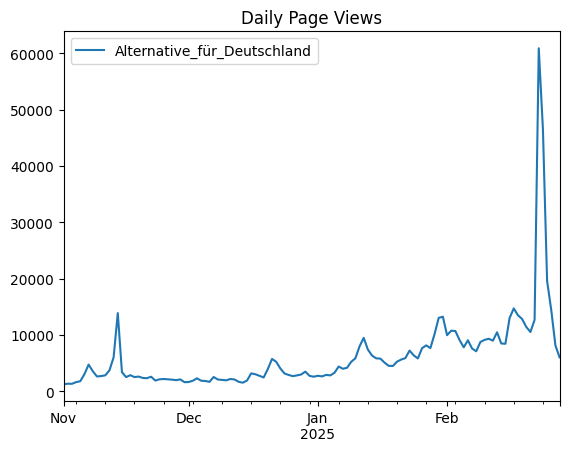

In [356]:
plot = df6_3.plot(title='Daily Page Views')

## Weekly Data 

In [362]:
# Make sure index is datetime
df6_3.index = pd.to_datetime(df6_3.index)

# Resample to weekly (sum of daily views per week)
weekly_views = df6_3.resample('W-MON').sum()


In [363]:
weekly_views

,Alternative_für_Deutschland
2024-11-04,5456
2024-11-11,21166
2024-11-18,34774
2024-11-25,15952
2024-12-02,13269
2024-12-09,14185
2024-12-16,14376
2024-12-23,27081
2024-12-30,20642
2025-01-06,21271


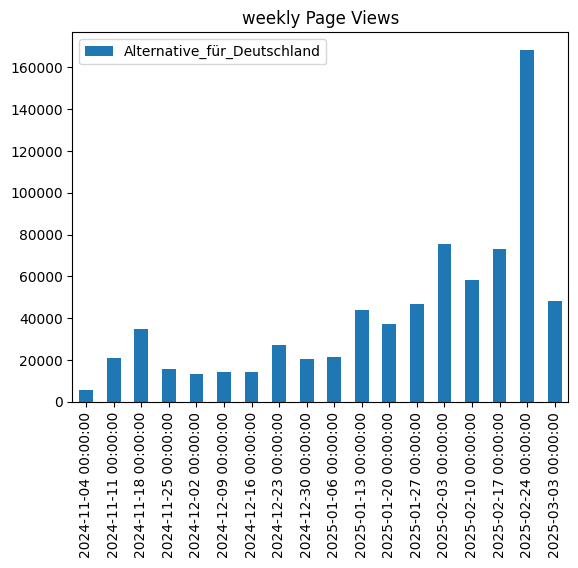

In [364]:
plotweekly = weekly_views.plot(title='weekly Page Views', kind = 'bar')

In [366]:
weekly_views.to_csv('quest2_wiki.csv')
df6_3.to_csv('quest2_wiki_daily.csv')